In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

%matplotlib inline

In [13]:
iris = sklearn.datasets.load_iris()

data_X = iris.data[:, :3]
print data_X
print data_X.shape

data_Y = iris.target
data_Y = data_Y.reshape(150,1)
print data_Y
print data_Y.shape


[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

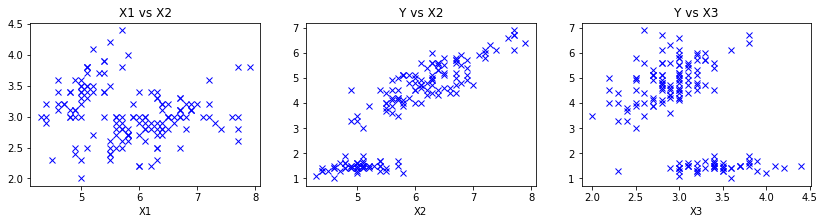

In [17]:
plt.figure(figsize=(14,3))

plt.subplot(131)
plt.title('X1 vs X2')
plt.xlabel('X1')
plt.plot(data_X[0:,0], data_X[0:,1], 'bx')

plt.subplot(132)
plt.title('Y vs X2')
plt.xlabel('X2')
plt.plot(data_X[0:,0], data_X[0:,2], 'bx')

plt.subplot(133)
plt.title('Y vs X3')
plt.xlabel('X3')
plt.plot(data_X[0:,1], data_X[0:,2], 'bx')

plt.show();

In [ ]:
z = np.dot(X, theta)
h = sigmoid(z)

In [19]:
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))




In [31]:
sigmoid_activation(-3)

0.04742587317756678

In [ ]:
def compute_cost(y, y_predicted):
    squared_differences = [data**2 for data in (y-y_predicted)]
    cost = sum(squared_differences) / float(len(y))   
    return cost

In [ ]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [18]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

SyntaxError: invalid syntax (<ipython-input-18-440d489435b7>, line 32)

In [182]:
# Feature scaling

feature_means = np.mean(data_X, axis=0)
feature_stds = np.std(data_X, axis=0)

data_X_scaled = np.ones((20,4))
array_means = np.tile(feature_means,(20,1))
array_stds = np.tile(feature_stds,(20,1))

data_X_scaled[0:,1:4] = (data_X[0:,1:4]-array_means[0:,1:4]) / array_stds[0:,1:4]
print data_X_scaled

[[ 1.         -1.44422654 -1.55210058  1.5924099 ]
 [ 1.         -1.2953372  -1.48476433  1.4489754 ]
 [ 1.         -1.2953372  -1.41742807  1.36865207]
 [ 1.         -0.99755854 -1.01341057  1.32849041]
 [ 1.         -0.8486692  -0.87873807  1.12194472]
 [ 1.         -0.8486692  -0.81140182  0.88671213]
 [ 1.         -0.69977987 -0.81140182  0.6916412 ]
 [ 1.         -0.4020012  -0.34004807  0.35313576]
 [ 1.         -0.4020012  -0.27271181  0.11790317]
 [ 1.         -0.25311187 -0.07070306 -0.0083192 ]
 [ 1.         -0.10422253 -0.00336681 -0.26076393]
 [ 1.          0.0446668   0.26597819 -0.39272368]
 [ 1.          0.34244547  0.46798694 -0.64516842]
 [ 1.          0.64022413  0.53532319 -0.78860292]
 [ 1.          0.78911347  0.87200445 -0.96646171]
 [ 1.          0.78911347  1.0740132  -1.0869467 ]
 [ 1.          1.08689214  1.14134945 -1.09268408]
 [ 1.          1.23578147  1.2086857  -1.15579526]
 [ 1.          1.68244947  1.41069445 -1.21890645]
 [ 1.          1.98022814  1.68

In [261]:
# Normal equation


true_params = np.dot(np.dot(np.linalg.pinv(np.dot(data_X_scaled.T, data_X_scaled)),data_X_scaled.T), data_Y)
print true_params

y_pred = make_prediction(true_params, data_X_scaled)
print y_pred




[[36.1       ]
 [-0.91762038]
 [ 5.56269974]
 [-2.46764019]]
[[24.86188755]
 [25.45377976]
 [26.02656017]
 [28.09984499]
 [29.22204424]
 [30.17708498]
 [30.52182596]
 [33.70588722]
 [34.66092796]
 [35.95948949]
 [36.82037972]
 [38.50767038]
 [39.98107941]
 [40.43634774]
 [42.61147207]
 [44.03249969]
 [44.14798105]
 [44.5416642 ]
 [45.41124226]
 [46.82033114]]


X training data is 20x4
Y is 20x1
Y predicted has to be 20x1
Y pred (20x1) = X training (20x4) * Params (4x1)

In [203]:
def make_prediction(params,X):
    y = np.dot(X, params)
    return y

In [217]:
params=np.zeros((4,1))
print params
y_pred = make_prediction(params, data_X_scaled)
print y_pred


[[0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [43]:
def compute_cost(y, y_predicted):
    squared_differences = [data**2 for data in (y-y_predicted)]
    cost = sum(squared_differences) / float(len(y))   
    return cost

In [101]:
y_test = make_prediction(params, data_X)
cost = compute_cost(data_train[3].T, y_test)
print cost
print data_train[3].T
print y_test

[1545614.394145 1539393.885145 1533191.376145 1527006.867145
 1529066.370145 1524949.364145 1522893.861145 1520840.358145
 1514691.849145 1512646.346145 1504484.334145 1512646.346145
 1506521.837145 1508561.340145 1504484.334145 1502448.831145
 1498383.825145 1496354.322145 1496354.322145 1490277.813145]
[21. 24. 27. 30. 29. 31. 32. 33. 36. 37. 41. 37. 40. 39. 41. 42. 44. 45.
 45. 48.]
[[2149.36]
 [2051.39]
 [1995.42]
 [1971.6 ]
 [1829.66]
 [1665.69]
 [1531.69]
 [1299.9 ]
 [1135.93]
 [1050.02]
 [ 876.05]
 [ 786.17]
 [ 614.26]
 [ 518.29]
 [ 396.44]
 [ 312.53]
 [ 312.56]
 [ 270.59]
 [ 232.68]
 [ 184.8 ]]


In [255]:
def gradient_descent(X, y, params_current, epochs, learning_rate):
    
    cost_array = np.zeros((2,epochs))
    
    for i in range(epochs):
        
        y_current = make_prediction(params_current,X)
        # print y_current
        
        cost = compute_cost(y, y_current)
        # print cost
        
        gradients = -2/float(len(y)) * (np.dot(X.T,y - y_current))
        params_current = params_current - (learning_rate * gradients)


        cost_array[:,i] = [i, cost]    
    return params_current, cost, cost_array

In [276]:
[params_current, cost, cost_array] = gradient_descent(data_X_scaled, data_Y, params_current=np.zeros((4,1)), epochs=2000, learning_rate=0.001)

print 'Params found:'
print params_current
print 'Params true:'
print true_params

y_pred = make_prediction(params_current, data_X_scaled)
print y_pred

print data_Y-y_pred

y_pred = make_prediction(true_params, data_X_scaled)
print y_pred

print data_Y-y_pred



Params found:
[[35.44144845]
 [ 2.12261737]
 [ 2.43967156]
 [-2.57627641]]
Params true:
[[36.1       ]
 [-0.91762038]
 [ 5.56269974]
 [-2.46764019]]
[[24.48680442]
 [25.33664478]
 [25.7078582 ]
 [27.42906593]
 [28.60577648]
 [29.37607899]
 [30.19467071]
 [32.8487728 ]
 [33.61907532]
 [34.75312911]
 [35.88380995]
 [37.19692316]
 [38.97219574]
 [40.13807119]
 [41.73371135]
 [42.53694899]
 [43.34807857]
 [43.99098385]
 [45.59451596]
 [47.07585348]]
[[-3.48680442]
 [-1.33664478]
 [ 1.2921418 ]
 [ 2.57093407]
 [ 0.39422352]
 [ 1.62392101]
 [ 1.80532929]
 [ 0.1512272 ]
 [ 2.38092468]
 [ 2.24687089]
 [ 5.11619005]
 [-0.19692316]
 [ 1.02780426]
 [-1.13807119]
 [-0.73371135]
 [-0.53694899]
 [ 0.65192143]
 [ 1.00901615]
 [-0.59451596]
 [ 0.92414652]]
[[24.86188755]
 [25.45377976]
 [26.02656017]
 [28.09984499]
 [29.22204424]
 [30.17708498]
 [30.52182596]
 [33.70588722]
 [34.66092796]
 [35.95948949]
 [36.82037972]
 [38.50767038]
 [39.98107941]
 [40.43634774]
 [42.61147207]
 [44.03249969]
 [44.1479

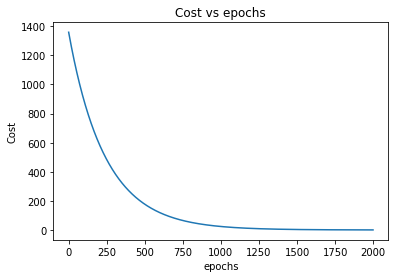

In [272]:
plt.plot(cost_array[0], cost_array[1])
plt.ylabel('Cost')
plt.xlabel('epochs')
plt.title('Cost vs epochs')
plt.show()

In [ ]:
        #gradients = -2/float(len(y)) * sum(X * (y - y_current))
        #params_current = params_current - (learning_rate * gradients)
